# Cours de ML 03/05
 Modele lineaire exo

liens exo : 
https://gist.github.com/bdallard/6a64a433df4001ba86d4b49aa64e6c5e
https://gist.github.com/bdallard/5d61731941e2ddfb62f130d0c8a4dd0d 

 lien utile : 
 https://www.youtube.com/watch?v=_b_50uILuok&ab_channel=Promath 
 https://fr.wikipedia.org/wiki/R%C3%A9gression_lin%C3%A9aire

Savoir si c'est possible de donnée le prix d'un appart en fonction des criteres - Régression linéaire

## Implémenter une régression linéaire

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib as mat
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [ ]:
df1 = pd.read_csv('../content/price_availability.csv', sep=';');

In [ ]:
df2 = pd.read_csv('../content/listings_final.csv', sep=';');

In [ ]:
df1

listing_id         day  ... local_price  min_nights
0           9810829  2018-12-08  ...         160           1
1           9810829  2018-12-08  ...         160           1
2          20897010  2018-12-09  ...         172           2
3          20897010  2018-12-09  ...         172           2
4          20897010  2018-12-09  ...         172           2
...             ...         ...  ...         ...         ...
4748691    23608395  2018-09-06  ...          24           1
4748692    23608395  2018-09-06  ...          24           1
4748693     1447132  2018-12-27  ...         125           3
4748694     1447132  2018-12-27  ...         125           3
4748695     1447132  2018-12-27  ...         125           3

[4748696 rows x 7 columns]

In [ ]:
df2

Unnamed: 0  listing_id  ... pricing_weekly_factor pricing_monthly_factor
0             0    28581061  ...                  1.00                   1.00
1             1      661961  ...                  0.88                   0.69
2             2     1261705  ...                  1.00                   1.00
3             3     1318834  ...                  0.82                   0.48
4             4     1677091  ...                  0.95                   0.90
..          ...         ...  ...                   ...                    ...
995         995    28335197  ...                  0.79                   1.00
996         996    28583013  ...                  1.00                   1.00
997         997    28628316  ...                  1.00                   1.00
998         998    28792796  ...                  1.00                   1.00
999         999    28682896  ...                  1.00                   1.00

[1000 rows x 19 columns]

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4748696 entries, 0 to 4748695
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   listing_id      int64 
 1   day             object
 2   created         object
 3   available       bool  
 4   local_currency  object
 5   local_price     int64 
 6   min_nights      int64 
dtypes: bool(1), int64(3), object(3)
memory usage: 221.9+ MB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   listing_id                1000 non-null   int64  
 2   name                      1000 non-null   object 
 3   type                      1000 non-null   object 
 4   city                      1000 non-null   object 
 5   neighborhood              935 non-null    object 
 6   latitude                  1000 non-null   float64
 7   longitude                 1000 non-null   float64
 8   person_capacity           1000 non-null   int64  
 9   beds                      1000 non-null   int64  
 10  bedrooms                  1000 non-null   int64  
 11  bathrooms                 1000 non-null   float64
 12  is_rebookable             1000 non-null   bool   
 13  is_new_listing            1000 non-null   bool   
 14  is_fully_

Fusion des 2 tableaux 
construire une regression linéaire pour des données en entrée
donnée labelisé
apple algo 

In [ ]:
 total=0;
 j=1;

 for i in range(1,len(df1)+1):
   total=df1.local_price[i];
   if df1.listing_id[i]==df1.listing_id[i+1]:
     while df1.listing_id[i]==df1.listing_id[i+1]:
      total = total + df1.local_price[i+1];
      j=j+1;
      df1.drop(df1.local_price[i+1]);
   df1.local_price[i]=total/j;
 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
df3 = pd.merge(df1, df2, how="inner", left_on="listing_id", right_on="listing_id")

In [ ]:
df3

listing_id         day  ... pricing_monthly_factor   price_avg
0         17757345  2018-10-14  ...                    1.0   41.697128
1         17757345  2018-10-14  ...                    1.0   41.697128
2         17757345  2018-10-14  ...                    1.0   41.697128
3         17757345  2018-10-05  ...                    1.0   41.697128
4         17757345  2018-10-05  ...                    1.0   41.697128
...            ...         ...  ...                    ...         ...
402611    23282000  2018-11-11  ...                    1.0  690.000000
402612    23282000  2018-11-11  ...                    1.0  690.000000
402613    23282000  2018-10-23  ...                    1.0  690.000000
402614    23282000  2018-10-23  ...                    1.0  690.000000
402615    23282000  2018-10-23  ...                    1.0  690.000000

[402616 rows x 26 columns]

In [ ]:
df1=df1[df1['local_price'].notna()]
df1

listing_id         day  ... local_price  min_nights
0           9810829  2018-12-08  ...         160           1
1           9810829  2018-12-08  ...         160           1
2          20897010  2018-12-09  ...         172           2
3          20897010  2018-12-09  ...         172           2
4          20897010  2018-12-09  ...         172           2
...             ...         ...  ...         ...         ...
4748691    23608395  2018-09-06  ...          24           1
4748692    23608395  2018-09-06  ...          24           1
4748693     1447132  2018-12-27  ...         125           3
4748694     1447132  2018-12-27  ...         125           3
4748695     1447132  2018-12-27  ...         125           3

[4748696 rows x 7 columns]

Correction : 

In [ ]:
# on créé g --> tableau de clés associatives de la forme [listing_id => [ses historiques de prix]]
g = df1.groupby('listing_id');

# on ajoute une nouvelle colonne dans le DataFrame qui contient toutes les infos
df2['price_avg']=0

# on fait un boucle sur les lignes du DataFrame qui contient toutes les infos (i = index, x = data)
for (i,x) in df2.iterrows():
  #on vérifie que le listing_id possède bien des historiques de prix en regardant 
  #si la valeur de listing_id est bien une clé du tableau d'historique g
  if i in df2.index and x.listing_id in g.groups.keys():
    # on ajoute pour la ligne i (qui correspond à la ligne) 
    # et pour la colonne price_avg la moyenne de tous les historiques de prix
    df2.loc[i,'price_avg'] = g.get_group(x.listing_id).local_price.mean()

df2

Unnamed: 0  listing_id  ... pricing_monthly_factor   price_avg
0             0    28581061  ...                   1.00   45.948454
1             1      661961  ...                   0.69   44.473684
2             2     1261705  ...                   1.00   49.000000
3             3     1318834  ...                   0.48  165.000000
4             4     1677091  ...                   0.90   69.774436
..          ...         ...  ...                    ...         ...
995         995    28335197  ...                   1.00   38.507732
996         996    28583013  ...                   1.00  147.752551
997         997    28628316  ...                   1.00  152.860825
998         998    28792796  ...                   1.00   49.184211
999         999    28682896  ...                   1.00   39.503937

[1000 rows x 20 columns]

## Données d'entrée

In [ ]:
#définir 2 variables de travail
#X := les features à utiliser 
#Y := la target (prix)

X = df2[['person_capacity','beds','bedrooms','bathrooms']]
Y = df2['price_avg']

In [ ]:
X,Y

(     person_capacity  beds  bedrooms  bathrooms
 0                  1     1         1        2.0
 1                  2     1         1        1.0
 2                  1     1         1        1.0
 3                  3     2         2        1.0
 4                  2     1         1        1.0
 ..               ...   ...       ...        ...
 995                2     1         0        1.0
 996                3     1         1        1.0
 997                4     2         1        1.0
 998                6     4         2        1.5
 999                2     1         1        1.0
 
 [1000 rows x 4 columns], 0       45.948454
 1       44.473684
 2       49.000000
 3      165.000000
 4       69.774436
           ...    
 995     38.507732
 996    147.752551
 997    152.860825
 998     49.184211
 999     39.503937
 Name: price_avg, Length: 1000, dtype: float64)

In [ ]:
X.isna().sum()
Y.isna().sum()

0

In [ ]:
#utiliser la méthode split de sklearn en splitant avec un alpha=30 et un random state=42 
#afficher la shape de vos données
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.3, random_state=42)
X_train.shape, y_train.shape, X_test.shape,y_test.shape

((700, 4), (700,), (300, 4), (300,))

## Entrainement

In [ ]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression()


In [ ]:
reg.fit(X_train.values,y_train.values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#R2
reg.score(X_train,y_train)

0.4055738565691201

In [ ]:
#a coef directeur pour chaque valeur choisir , person_capacity,beds,bedrooom, bathroom
#normalement elle devrait etre croissante car 3 valeurs positives sur 4
#coef béta_j
reg.coef_

array([ 43.92326311, -33.39071743,  26.4891331 ,  90.14340271])

In [ ]:
#b = ordonnéer à l'origine
#coef intercept beta_0
reg.intercept_

-49.96187385427697

In [ ]:
X_train

person_capacity  beds  bedrooms  bathrooms
541                5     2         1        1.0
440                3     2         0        1.0
482                2     1         0        1.0
422                6     2         2        1.0
778                2     1         1        1.0
..               ...   ...       ...        ...
106                6     3         3        1.5
270                2     1         0        1.0
860                2     1         0        1.0
435                4     2         0        1.0
102                5     4         3        2.0

[700 rows x 4 columns]

Le prix repose principalement sur ses 4 facteurs car plus il y a un nombre important de person_capacity,bed,bedroom et bathroom plus le prix augmente. Parailleur celle qui influance le plus le prix c'est la salle de bain, en moyenne de facon globale on rajoute 90€/nuit par salle de bain en plus dans le logement.

Le lit de façon globale est un facteur affectant la réservation ou non.

Notre modèle n'est pas bon car on commence à -50€ pour toute les valeurs à 0. Mais il était important pour savoir ce qui était importante qui contribut à l'augmentation du prix / nuit

## Validation du modèle
Le coefficient de détermination R²

In [ ]:
#prédiction des prix pour les 300 valeurs 
reg.predict(X_test)

array([ 175.58227955,   27.85590279,  292.21481536,  175.58227955,
        158.14814954,  166.19817211,   94.63733765,   50.71407454,
        131.65901644,  168.68069522,  105.16988333,  121.12647075,
        594.09920281,  208.97299698,  208.97299698,  202.07141265,
         94.63733765,  329.23649414,  131.65901644,  256.52722144,
         94.63733765,  168.68069522,  508.37486132,  427.61556605,
        300.45048456,  121.12647075,  262.45505928,   94.63733765,
         94.63733765,  202.07141265,  316.91086808,  254.04469833,
        131.65901644,  121.12647075,  175.58227955,  418.23145861,
        186.11482523,   94.63733765,  292.21481536,  152.7241078 ,
        593.1364112 ,  213.75239657,  276.25822794,   94.63733765,
        176.73071779,  202.07141265,   94.63733765,  257.67565969,
        175.58227955,  175.58227955,  633.24306633,  202.07141265,
        261.30662104,  158.14814954,   94.63733765,  283.01635455,
        121.12647075,  247.143114  ,  292.21481536,  551.14968

In [ ]:
#r2
reg.score(X_test,y_test.astype('int'))

0.3363635824917448

Correction

In [ ]:
#faire prediction sur X
Y_pred=reg.predict(X_test)
len(Y_pred)

300

In [ ]:
Y_pred

array([ 175.58227955,   27.85590279,  292.21481536,  175.58227955,
        158.14814954,  166.19817211,   94.63733765,   50.71407454,
        131.65901644,  168.68069522,  105.16988333,  121.12647075,
        594.09920281,  208.97299698,  208.97299698,  202.07141265,
         94.63733765,  329.23649414,  131.65901644,  256.52722144,
         94.63733765,  168.68069522,  508.37486132,  427.61556605,
        300.45048456,  121.12647075,  262.45505928,   94.63733765,
         94.63733765,  202.07141265,  316.91086808,  254.04469833,
        131.65901644,  121.12647075,  175.58227955,  418.23145861,
        186.11482523,   94.63733765,  292.21481536,  152.7241078 ,
        593.1364112 ,  213.75239657,  276.25822794,   94.63733765,
        176.73071779,  202.07141265,   94.63733765,  257.67565969,
        175.58227955,  175.58227955,  633.24306633,  202.07141265,
        261.30662104,  158.14814954,   94.63733765,  283.01635455,
        121.12647075,  247.143114  ,  292.21481536,  551.14968

In [ ]:
X_test

person_capacity  beds  bedrooms  bathrooms
521                4     2         1        1.0
737                2     3         0        1.0
740                4     2         2        2.0
660                4     2         1        1.0
411                3     2         2        1.0
..               ...   ...       ...        ...
468                4     3         2        1.0
935                2     1         1        1.0
428                2     1         1        1.0
7                  2     2         1        1.0
155                2     1         0        1.0

[300 rows x 4 columns]

In [ ]:
y_test

521    180.000000
737    131.000000
740    297.000000
660    410.000000
411    156.140385
          ...    
468    195.000000
935     99.000000
428     72.645833
7      213.324607
155     79.000000
Name: price_avg, Length: 300, dtype: float64

In [ ]:
y_test.shape

(300,)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#afficher l'erreur des moindres carrées sur l'ensemble d'entrainement ainsi que le R2
print("Mean squared error - score moyenne des erreur au carrée : %.2f" % mean_squared_error(y_test, Y_pred));
#il faut donc trouver les euros qu'on fait en erreur 
#precision de notre algo
print("Variance R2: %.2f" % r2_score(y_test,Y_pred))

Mean squared error - score moyenne des erreur au carrée : 23353.18
Variance R2: 0.34


In [ ]:
#153€ d'erreur par nuit - 23353.18 = score moyenne des erreurs au carrée -> beaucoup trop d'erreur
np.sqrt(23353.18)

152.8174728229727

# Classification

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

Pour cet exemple, nous simulons une fonction sinus avec des bruits aléatoires et indépendants.

In [9]:
# le random dataset
rng = np.random.RandomState(1)
#on trie les donnée en ordre croissant | donnée rambon 80 mais max 5 |tier sur l'axe 0
X = np.sort(5 * rng.rand(80, 1), axis=0)
print(X)
# y= target
#on met y en sinus et on renvoie un tableau aplati contigu avec ravel 
#contigu : Deux caractères sont dits contigus s'ils sont séparés par une distance inférieure à une distance spécifiée
y = np.sin(X).ravel()

# le bruit ajouté 
y[::5] += 3 * (0.5 - rng.rand(16))
print(y)

[[5.71874087e-04]
 [9.14413867e-02]
 [9.68347894e-02]
 [1.36937966e-01]
 [1.95273916e-01]
 [2.49767295e-01]
 [2.66812726e-01]
 [4.25221057e-01]
 [4.61692974e-01]
 [4.91734169e-01]
 [5.11672144e-01]
 [5.16130033e-01]
 [6.50142861e-01]
 [6.87373521e-01]
 [6.96381736e-01]
 [7.01934693e-01]
 [7.33642875e-01]
 [7.33779454e-01]
 [8.26770986e-01]
 [8.49152098e-01]
 [9.31301057e-01]
 [9.90507445e-01]
 [1.02226125e+00]
 [1.05814058e+00]
 [1.32773330e+00]
 [1.40221996e+00]
 [1.43887669e+00]
 [1.46807074e+00]
 [1.51166286e+00]
 [1.56712089e+00]
 [1.57757816e+00]
 [1.72780364e+00]
 [1.73882930e+00]
 [1.98383737e+00]
 [1.98838418e+00]
 [2.07027994e+00]
 [2.07089635e+00]
 [2.08511002e+00]
 [2.08652401e+00]
 [2.09597257e+00]
 [2.10553813e+00]
 [2.23946763e+00]
 [2.45786580e+00]
 [2.57444556e+00]
 [2.66582642e+00]
 [2.67948203e+00]
 [2.69408367e+00]
 [2.79344914e+00]
 [2.87058803e+00]
 [2.93277520e+00]
 [2.94652768e+00]
 [3.31897323e+00]
 [3.35233755e+00]
 [3.39417766e+00]
 [3.42609750e+00]
 [3.432504

# Les arbres de régression

Nous allons créer $4$ arbres de régression ayant une profondeur différente (respectivement 2, 3, 4 et 6). Pour chacun des arbres :

On crée l'objet scikit-learn permettant d'effectuer la régression par un arbre de décision
On optimise l'arbre sur nos données
On prédit l'arbre sur des données simulés

On essaye de générer une fonction (sinus) qui colle le plus possible a notre jeu de donnée sans etre over fitting et under fitting 

In [10]:
# Fit regression model
regressors = []
#différente profondeur que graph qu'on aura
depths = [2, 3, 4, 6]
#valeur de test de 0 à 5 avec un pas de 0.01
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis] 
#la où on va mettre les prédictions par rapport à X
Y_test = []
for p in depths:
    reg = DecisionTreeRegressor(max_depth=p)  # Création d'un arbre de régression de profondeur p
    reg.fit(X, y)  # Processus d'optimisation de l'arbre
    Y_test.append(reg.predict(X_test))  # On prédit sur les données et on ajoute à la liste des valeurs prédites
    regressors.append(reg) #mettre la fonction reg en elle même


Enfin, nous pouvons afficher les données d'entrées et les valeurs prédites pour chaque arbre.

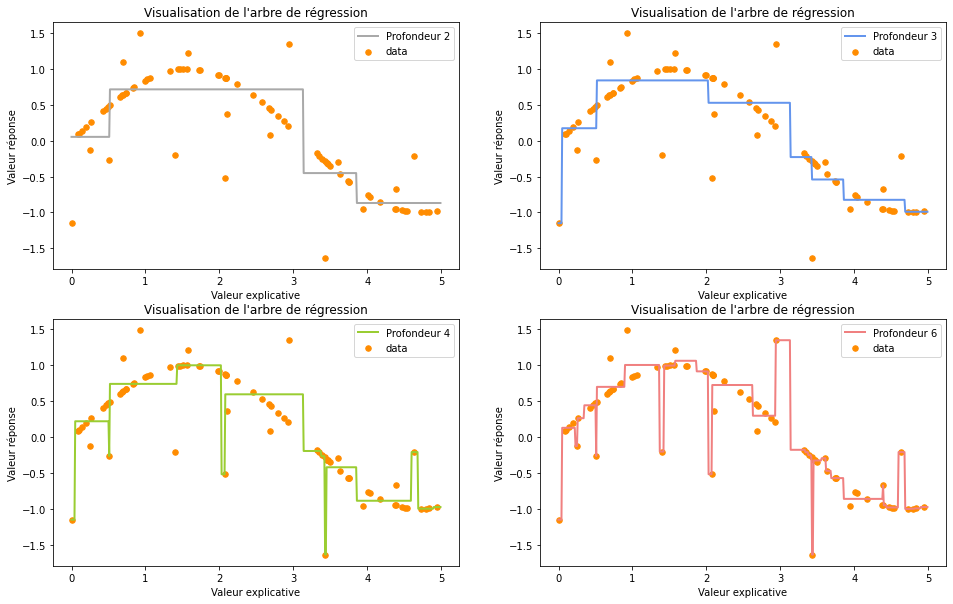

In [8]:
plt.figure(figsize=(16, 10))
colors = [ "darkgray", "cornflowerblue", "yellowgreen", "lightcoral"]

for i, reg in zip(range(len(regressors)), regressors):
    plt.subplot(220 + i + 1)
    plt.plot(X_test, Y_test[i], color=colors[i], label="Profondeur {0}".format(depths[i]), linewidth=2)
    plt.scatter(X, y, s=30, c="darkorange", label="data")
    plt.xlabel("Valeur explicative")
    plt.ylabel("Valeur réponse")
    plt.title("Visualisation de l'arbre de régression")
    plt.legend()
    
plt.show()

Comparez les graphiques obtenus.

1. under fitting 

2. colle appeut pres à l'allure de la courbe  - prondeur de 3 

3. over fitting - car il suit le bruit rajouter avec des valeurs aléatoire
4. over fitting - car il suit trop le bruit rajouter avec des valeurs aléatoire

On fait de la modélisation
Algo classification : variable pas forcément numérique 
Algo régression : variable numérique

Attention hyperparametre (choix important) -> modifie le comportement de l'algo - plus on bouge se parametre plus on veut coller au donnée donc on fait de l'over fitting 

Faire des compromis entre les biais et variances (les accuracy)

But : on enlve pas le bruit car on sait pas ce qui est le bruit ou pas 
Exemple : séisme 

Le but est que notre algo soit résistant au bruit 
d= profondeur 
d+1 coupure

split = permet de définir les noeux 

But : découper X pour savoir celon le X le Y qu'on aura - Prédire la valeur d'un sinus  

à 3.1, la réponse valeur est entre - 0.4 et 0.7 
CF dessin 




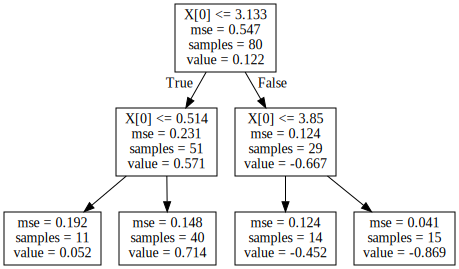

In [11]:
import graphviz 
dot_data = tree.export_graphviz(regressors[0], out_file=None) 
graph = graphviz.Source(dot_data) 
graph

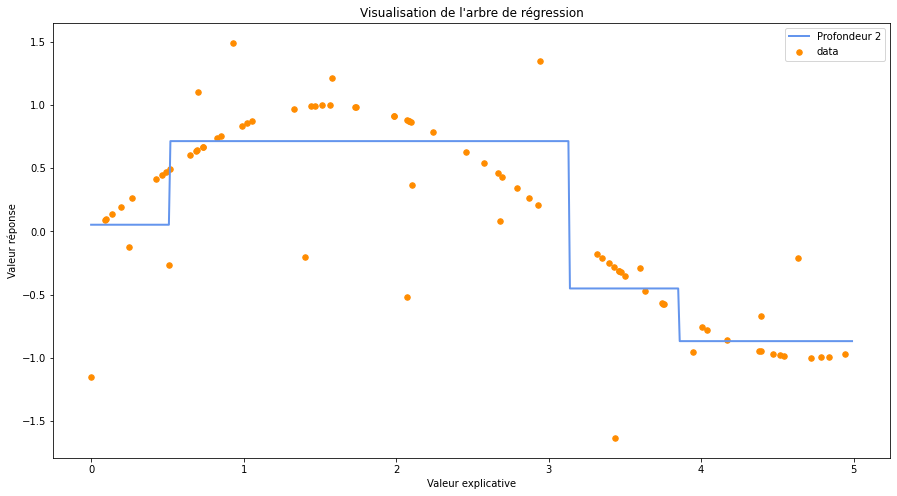

In [12]:
plt.figure(figsize=(15, 8))
plt.plot(X_test, Y_test[0], color="cornflowerblue", label="Profondeur 2", linewidth=2)
plt.scatter(X, y, s=30, c="darkorange", label="data")
plt.xlabel("Valeur explicative")
plt.ylabel("Valeur réponse")
plt.title("Visualisation de l'arbre de régression")
plt.legend()
    
plt.show()